<a href="https://colab.research.google.com/github/USHIERU/k-means/blob/main/k_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Class Nodo

In [21]:
class Nodo:
    def __init__(self, x: int, y: int):
        self.x = x
        self.y = y

    def __str__(self):
        return 'class Nodo: X = ' + str(self.x) + ', Y = ' + str(self.y)

    @staticmethod
    def distance(nodo1, nodo2) -> float:
        return ((nodo2.x-nodo1.x)**2 + (nodo2.y-nodo1.y)**2)**0.5

## Class Centroide

In [22]:
class Centroide(Nodo):
    def __init__(self, x: int, y: int, name=''):
        super().__init__(x, y)
        self.name = name
        self.nodos = []

    def add_dato(self, dato: Nodo):
        self.nodos.append(dato)

    def get_datos(self):
        return self.nodos

    def clean_data(self):
        self.nodos = []

    def move(self, new_x, new_y):
        self.x = new_x
        self.y = new_y

    def __str__(self):
        return 'class Centroide: X = ' + str(self.x) + ', Y = ' + str(self.y) + ' name = ' + self.name

## Helper Functions

In [23]:
def shorter_distance(arrayDistances) -> float:
    index = 0
    dist = arrayDistances[0]['distance']

    for dictionary in arrayDistances:
        if dictionary['distance'] < dist:
            dist = dictionary['distance']
            index = dictionary['index']

    return index, dist


def mean_x(datos: [Nodo]) -> float:
    length = len(datos)
    if length == 0:
      return 0

    suma = 0

    for nodo in datos:
        suma += nodo.x

    return suma / length


def mean_y(datos: [Nodo]) -> float:
  length = len(datos)
  if length == 0:
    return 0

  suma = 0
  for nodo in datos:
    suma += nodo.y

  return suma / length


def generar_color():
    values = ['0', '1', '2', '3', '4', '5', '6',
              '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'f']
    n = '#'
    for _ in range(6):
        n = n + random.choice(values)
    return n

## Main

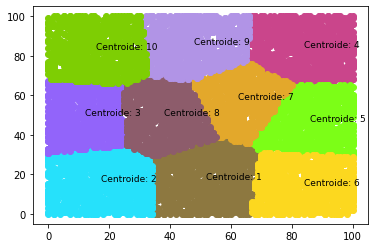

In [24]:
import matplotlib.pyplot as plt
import random

NODOS_TO_GENERATE = 10000
CENTROIDES_TO_GENERATE = 10
TOLERANCE = 0.01
nodos = []
centroides = []
error = 1

'''
    Generate random data
'''
for _ in range(NODOS_TO_GENERATE):
    x = random.randint(0, 100)
    y = random.randint(0, 100)
    nodos.append(Nodo(x, y))

for count in range(CENTROIDES_TO_GENERATE):
    x = random.randint(0, 100)
    y = random.randint(0, 100)
    centroides.append(Centroide(x, y, 'Centroide: ' + str(count + 1)))

'''
    Error calculation
'''
while error > TOLERANCE:
    [centroide.clean_data() for centroide in centroides]

    for nodo in nodos:
        distancias = []

        for index, centro in enumerate(centroides):
            datoAux = {
                'index': index,
                'distance': Nodo.distance(nodo, centro)
            }

            distancias.append(datoAux)

        index, _ = shorter_distance(distancias)

        centroides[index].add_dato(nodo)

    errores = []

    for centroide in centroides:
        old_x = centroide.x
        old_y = centroide.y

        centroide_datos = centroide.get_datos()
        centroide.move(mean_x(centroide_datos), mean_y(centroide_datos))

        new_x = centroide.x
        new_y = centroide.y

        errores.append(abs(old_x - new_x))

    error = max(errores)

'''
    Graph
'''
for centroide in centroides:
    array_x = []
    array_y = []

    for nodo in centroide.get_datos():
        array_x.append(nodo.x)
        array_y.append(nodo.y)

    plt.scatter(centroide.x, centroide.y, c=[generar_color()], marker="*")
    plt.text(centroide.x + .03, centroide.y + .03,
              centroide.name, fontsize=9)

    plt.scatter(array_x, array_y, c=generar_color())

plt.show()